<a href="https://colab.research.google.com/github/neesarg123/Devanagari-Letters-DL/blob/main/Fast_Gradient_Sign_Method_on_Devanagari_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## One Sentence Goal:
- Measure robustness of the model.

## Methodology:
- Use a Fast Gradient Sign Method (FSGM):
  - Basic Function: Computes and adds a noise vector (same in shape as input image) to the input that maximizes the prediction loss. 


In [ ]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from PIL import Image
import os 

In [ ]:
if not os.path.isdir('/content/Dataset'):
   !unzip "/content/drive/MyDrive/Devanagari Letters/DevanagariHandwrittenCharacterDataset.zip" -d "/content/Dataset/"

## Load in Our Model

In [24]:
model = keras.models.load_model('/content/drive/MyDrive/Model')

## Using a Test Image for Example

In [25]:
class_names = ['character_10_yna',
               'character_11_taamatar',
               'character_12_thaa',
               'character_13_daa',
               'character_14_dhaa',
               'character_15_adna',
               'character_16_tabala',
               'character_17_tha',
               'character_18_da',
               'character_19_dha',
               'character_1_ka',
               'character_20_na',
               'character_21_pa',
               'character_22_pha',
               'character_23_ba',
               'character_24_bha',
               'character_25_ma',
               'character_26_yaw',
               'character_27_ra',
               'character_28_la',
               'character_29_waw',
               'character_2_kha',
               'character_30_motosaw',
               'character_31_petchiryakha',
               'character_32_patalosaw',
               'character_33_ha',
               'character_34_chhya',
               'character_35_tra',
               'character_36_gya',
               'character_3_ga',
               'character_4_gha',
               'character_5_kna',
               'character_6_cha',
               'character_7_chha',
               'character_8_ja',
               'character_9_jha',
               'digit_0',
               'digit_1',
               'digit_2',
               'digit_3',
               'digit_4',
               'digit_5',
               'digit_6',
               'digit_7',
               'digit_8',
               'digit_9']

Enter path of test image: /content/Dataset/DevanagariHandwrittenCharacterDataset/Test/character_33_ha/13246.png


(-0.5, 31.5, 31.5, -0.5)

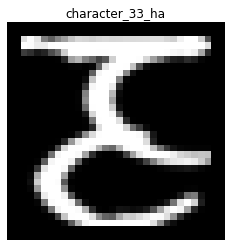

In [52]:
test_img_path = input("Enter path of test image: ")

img = Image.open(test_img_path)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
plt.imshow(np.asarray(img), cmap='gray', vmin=0, vmax=255)
plt.title(class_names[np.argmax(score)])
plt.axis("off")

### Creating Noise Image

In [41]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

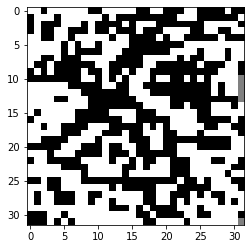

In [53]:
label = tf.one_hot(np.argmax(score), score.shape[-1])
label = tf.reshape(label, (1, score.shape[-1]))

perturbations = create_adversarial_pattern(img_array, label)
plt.imshow(np.squeeze(perturbations[0]) * 0.5 + 0.5, cmap='gray');  # To change [-1, 1] to [0,1]

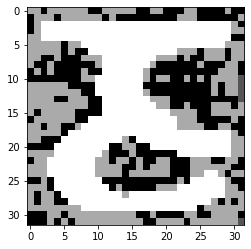

In [59]:
eps = 0.5
adv_x = img_array + eps * perturbations
adv_x = tf.clip_by_value(adv_x, -1, 1)

plt.imshow(np.squeeze(adv_x[0]) * 0.5 + 0.5, cmap='gray');  # To change [-1, 1] to [0,1]